## Import Libraries and Dependencies

In [55]:
# Import our dependencies
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn as skl
import tensorflow as tf

In [2]:
# Load the data
file_path = Path("resources/processed_stroke_db_w_cat.csv")
df = pd.read_csv(file_path, index_col=[0])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
df.shape

(4717, 22)

### WIP: One-hot Encoding for Categotical Data & StandScaler for Numerical Data

In [3]:
# Generate our categorical variable list
cat_labels= df.dtypes[df.dtypes == "object"].index.tolist()
print(cat_labels)

# Check the number of unique values in each column
print(df[cat_labels].nunique())



['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64


In [4]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[cat_labels]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(cat_labels)
encode_df.head()

# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(cat_labels,1)
df.head()

C:\Users\Kristen\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
# Split our preprocessed data into our features and target arrays
y = df["stroke"].values
X = df.drop(["stroke"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

C:\Users\Kristen\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Single Neuron / Single Layer Neural Network

### Train, Fit, Evaluate, Predict Model

In [29]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=21))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 22        
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs=100)

Epoch 1/100
111/111 [==============================] - 3s 13ms/step - loss: 1.0520 - accuracy: 0.5431 - val_loss: 0.9158 - val_accuracy: 0.5847
Epoch 2/100
111/111 [==============================] - 1s 6ms/step - loss: 0.8162 - accuracy: 0.6342 - val_loss: 0.7385 - val_accuracy: 0.6847
Epoch 3/100
111/111 [==============================] - 1s 5ms/step - loss: 0.6741 - accuracy: 0.7509 - val_loss: 0.6273 - val_accuracy: 0.8127
Epoch 4/100
111/111 [==============================] - 1s 6ms/step - loss: 0.5865 - accuracy: 0.8677 - val_loss: 0.5572 - val_accuracy: 0.9076
Epoch 5/100
111/111 [==============================] - 1s 6ms/step - loss: 0.5309 - accuracy: 0.9361 - val_loss: 0.5115 - val_accuracy: 0.9424
Epoch 6/100
111/111 [==============================] - 1s 7ms/step - loss: 0.4924 - accuracy: 0.9519 - val_loss: 0.4779 - val_accuracy: 0.9517
Epoch 7/100
111/111 [==============================] - 1s 7ms/step - loss: 0.4622 - accuracy: 0.9559 - val_loss: 0.4501 - val_accuracy: 0.954

Epoch 58/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1803 - accuracy: 0.9562 - val_loss: 0.1860 - val_accuracy: 0.9542
Epoch 59/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1803 - accuracy: 0.9562 - val_loss: 0.1860 - val_accuracy: 0.9542
Epoch 60/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1802 - accuracy: 0.9562 - val_loss: 0.1860 - val_accuracy: 0.9542
Epoch 61/100
111/111 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9562 - val_loss: 0.1859 - val_accuracy: 0.9542
Epoch 62/100
111/111 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9562 - val_loss: 0.1859 - val_accuracy: 0.9542
Epoch 63/100
111/111 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9562 - val_loss: 0.1859 - val_accuracy: 0.9542
Epoch 64/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1800 - accuracy: 0.9562 - val_loss: 0.1859 - val_accuracy:

In [32]:
# Create a DataFrame containing training history
nn_history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
nn_history_df

,loss,accuracy,val_loss,val_accuracy
1,1.052006,0.543116,0.915788,0.584746
2,0.816226,0.634153,0.738545,0.684746
3,0.674141,0.750919,0.627304,0.812712
4,0.586515,0.867684,0.557198,0.907627
5,0.530882,0.936104,0.511476,0.942373
...,...,...,...,...
96,0.179921,0.956178,0.185903,0.954237
97,0.179930,0.956178,0.185903,0.954237
98,0.179929,0.956178,0.185907,0.954237
99,0.179925,0.956178,0.185896,0.954237


<AxesSubplot:>

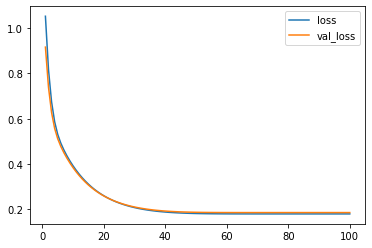

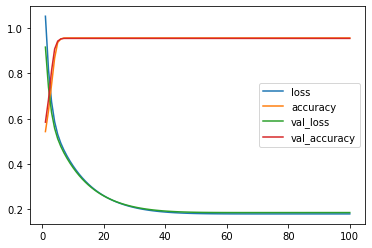

In [37]:
# Plot the loss
nn_history_df.plot(y=["loss", "val_loss"])
nn_history_df.plot()

<AxesSubplot:>

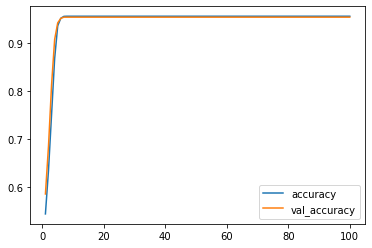

In [42]:
# Plot the accuracy
nn_history_df.plot(y=["accuracy", "val_accuracy"])

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

37/37 - 0s - loss: 0.1475 - accuracy: 0.9542 - 47ms/epoch - 1ms/step
Loss: 0.147474005818367, Accuracy: 0.9542372822761536


## Multiple Neuron Single Layer Neural Network

In [47]:
# Generate our new Sequential model
multi_nn_model = tf.keras.models.Sequential()

# Add the input and hidden layer
number_inputs = 21
number_hidden_nodes = 6

multi_nn_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
multi_nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
multi_nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model_multi = multi_nn_model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs=100, shuffle=True)

Epoch 1/100
111/111 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.9256 - val_loss: 0.2616 - val_accuracy: 0.9492
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9539 - val_loss: 0.2088 - val_accuracy: 0.9542
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9556 - val_loss: 0.1861 - val_accuracy: 0.9542
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9556 - val_loss: 0.1752 - val_accuracy: 0.9542
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9559 - val_loss: 0.1689 - val_accuracy: 0.9542
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9562 - val_loss: 0.1646 - val_accuracy: 0.9542
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9562 - val_loss: 0.1614 - val_accuracy: 0.9542

Epoch 58/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9576 - val_loss: 0.1474 - val_accuracy: 0.9551
Epoch 59/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9576 - val_loss: 0.1474 - val_accuracy: 0.9551
Epoch 60/100
111/111 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.1475 - val_accuracy: 0.9551
Epoch 61/100
111/111 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9573 - val_loss: 0.1470 - val_accuracy: 0.9551
Epoch 62/100
111/111 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9576 - val_loss: 0.1473 - val_accuracy: 0.9551
Epoch 63/100
111/111 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.1474 - val_accuracy: 0.9551
Epoch 64/100
111/111 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9570 - val_loss: 0.1476 - val_accuracy:

<AxesSubplot:>

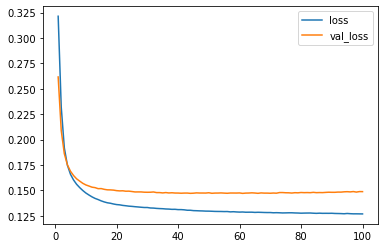

In [49]:
# Create a DataFrame containing training history
multi_history_df = pd.DataFrame(fit_model_multi.history, index=range(1,len(fit_model_multi.history["loss"])+1))

# Plot the loss
multi_history_df.plot(y=["loss", "val_loss"])

<AxesSubplot:>

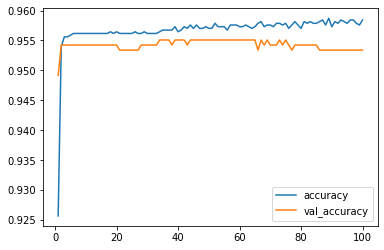

In [50]:
# Plot the accuracy
multi_history_df.plot(y=["accuracy", "val_accuracy"])

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = multi_nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

37/37 - 0s - loss: 0.1519 - accuracy: 0.9534 - 49ms/epoch - 1ms/step
Loss: 0.1519000083208084, Accuracy: 0.9533898234367371


## Deep Learning Neural Network

In [17]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

Deep_nn_model = tf.keras.models.Sequential()

# First hidden layer
Deep_nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
Deep_nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
Deep_nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
Deep_nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 176       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
Deep_nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
fit_model_deep = Deep_nn_model.fit(X_train,y_train, validation_data = (X_test_scaled, y_test), epochs=100)

Epoch 1/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9570 - val_loss: 0.7409 - val_accuracy: 0.8364
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9576 - val_loss: 0.7478 - val_accuracy: 0.8364
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9596 - val_loss: 0.7583 - val_accuracy: 0.8364
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9576 - val_loss: 0.7605 - val_accuracy: 0.8373
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9567 - val_loss: 0.7548 - val_accuracy: 0.8364
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9559 - val_loss: 0.7539 - val_accuracy: 0.8373
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9576 - val_loss: 0.7569 - val_accuracy: 0.8381

Epoch 58/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9579 - val_loss: 0.8246 - val_accuracy: 0.8593
Epoch 59/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9582 - val_loss: 0.8251 - val_accuracy: 0.8585
Epoch 60/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9570 - val_loss: 0.8282 - val_accuracy: 0.8585
Epoch 61/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9582 - val_loss: 0.8286 - val_accuracy: 0.8576
Epoch 62/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9579 - val_loss: 0.8235 - val_accuracy: 0.8602
Epoch 63/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9587 - val_loss: 0.8295 - val_accuracy: 0.8593
Epoch 64/100
111/111 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9573 - val_loss: 0.8314 - val_accuracy:

<AxesSubplot:>

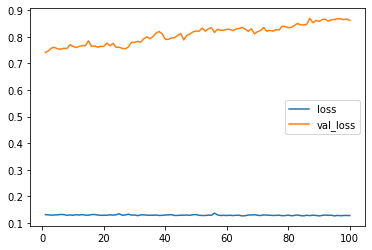

In [53]:
# Create a DataFrame containing training history
deep_history_df = pd.DataFrame(fit_model_deep.history, index=range(1,len(fit_model_deep.history["loss"])+1))

# Plot the loss
deep_history_df.plot(y=["loss", "val_loss"])

<AxesSubplot:>

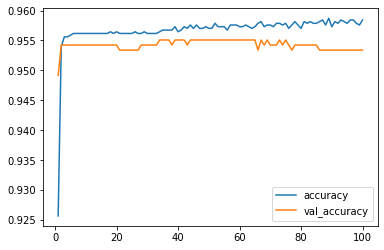

In [54]:
# Plot the accuracy
multi_history_df.plot(y=["accuracy", "val_accuracy"])

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = Deep_nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

37/37 - 0s - loss: 0.1544 - accuracy: 0.9508 - 110ms/epoch - 3ms/step
Loss: 0.15442565083503723, Accuracy: 0.9508474469184875
